### Model Selection

In fact, when we are given a datasets, what the standard step for the machine learning parts should follow the bellow step:

   1. Data clearning
   2. Data exploration
   3. Data preprocessing
   4. Baseline model building
   5. Algorithms chosen and model training
   6. Model evaluation
   7. Model tuning
   8. Model saving
   9. Model deployment
  
These is the general step that you should take, but I have make the parts more clearly. You have to know that the most important part is the feature engineering step aka preprossing part! Feature engineering is the upper bound of algorithms. But this tutorial will guide you with the model selection part, as we have so many algorithms that we could use and we have so many parameters that we could tune during the training step, so how to find the best model and parameters are the most important part after we have processed data(as you know that after we process the data, the feature space is fixed!)

For the model selection part, it contains 4 parts: 

   1. cross-validation
   2. model parameter selection
   3. model evalution
   4. model storation
   
I will show you each step with examples.
Here we go...

### 1. Cross-validation

What is cross-validation? The thing is that for the data we could use, one thing you should know is that if we get more and more data, then we could get a better model in fact, as the data gives us more chance to express more insight in the data! 

But we couldn't just use the whole data to train our model and use the data to evaluate our model, as the model has seen the data before, so the model will just give the perfect result of our train data, so we should split the data to 3 parts: `train data`, `validation data` and `test data`, we could use the `train data` to train our model and use the `validation data` to evaluate our various models(many different models), the `test data` should just use once!!! after we have decided to use which model(important!)

But you will know that we couldn't use the whole data, but can we use as much as data we can to fit the model? Here is cross-validation come out! Cross-validation is to split the train data to be `cv` parts(cv is integer number), then we could use `cv -1` parts to train our model and use `1` the rest part to evaluate our model parameters, you have to know that cross-validation is really time consuming, as you choose one piece of parameters of one algorithm, then you have to fit the model with `cv` times! But it is worthy! as using the cross-validation will reduce the variance of the model parameters also we use more data to train our model. 

Here I will show you how to use the cross-validation in sklearn.

In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

warnings.simplefilter('ignore')

x, y = load_iris(return_X_y=True)

# first we should split the data to train and test, 
# in fact we should use split the train data to train and validation parts
# but as the data is really small, you should do this in future work.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=1234)

In [3]:
# use the lr model without any parameter tuning and validation
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# compute the score on the testing data.
print('score: ', lr.score(xtest, ytest))

score:  0.9666666666666667


In [7]:
# so here we should use the cross-validation to evaluate our default parameters
# sklearn provides us with 3 types: cross_val_predict, cross_val_score, cross_validate;
# in fact, there are almost same with each other, but with different use case, logic is same
# Tips: cross-validation use 5-folds and 10-folds most common!

# first use the cross_val_score
cv_scores = cross_val_score(estimator=lr, X=xtrain, y=ytrain, cv=10)

print('with 10 times cv, model score list:')
print(cv_scores)

# not good as before, but we don't have too much variance. really small variance.
# about what is variance in machine learning, if you ask me, I will tell you
print('mean model accuracy: %.4f (with std +/- %.2f)' % (np.mean(cv_scores), np.std(cv_scores)))

with 10 times cv, model score list:
[0.92857143 0.92307692 1.         0.83333333 0.83333333 0.83333333
 1.         0.90909091 1.         1.        ]
mean model accuracy: 0.9261 (with std +/- 0.07)


In [8]:
# in fact, we could even shuffle（打乱） our train data to get a more robust(鲁棒性) model(means better model)
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit will split the data after shuffle the data
# cv object is the the shuffle iterator result
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=1234)

cv_scores = cross_val_score(estimator=lr, X=xtrain, y=ytrain, cv=cv)

print('with 10 times cv, model score list:')
print(cv_scores)

# not too much variance with above result(you know what? as the default is also shuffle the data.)
print('mean model accuracy: %.4f (with std +/- %.2f)' % (np.mean(cv_scores), np.std(cv_scores)))

with 10 times cv, model score list:
[0.91666667 0.95833333 0.95833333 0.83333333 1.         0.79166667
 0.875      1.         1.         0.95833333]
mean model accuracy: 0.9292 (with std +/- 0.07)


#### Pipeline(管道)

Sequeece the whole step with one object. in fact, you have learned the preproessing step to process the data like StandardScaler to make the data to be a normal distributin by with (x - x.mean(axis=0)) / x.std(axis=0).

what if we want to first standard the data, then evluate the model.you could just use the manually step to init the standard object and the lr object and fit and you will use the standard model to transform the test data and predict the test data. 
But there is a more effecient way to do this by using the pipeline. I will show you the both way.

The reason we use the pipeline is that when there are so many steps that we take like: Onehot-> standard-> lr -> ..., so we could combine the whole thing to be one.

In [11]:
# manaull step
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xtrain)

xtrain_scaler = scaler.transform(xtrain)

# xtest should also use the same scaler with fitted on the training data.
xtest_scaler = scaler.transform(xtest)

# fit and evaluate
lr = LogisticRegression()
lr.fit(xtrain_scaler, ytrain)

print('test accuracy:', lr.score(xtest_scaler, ytest))

test accuracy: 0.9333333333333333


In [16]:
# with the pipeline to combine the whole step with one
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# init the object that we need to use.
scaler = StandardScaler()
lr = LogisticRegression()

# combine into one pipeline object
pipe = make_pipeline(scaler, lr)

# fit the data by standard data then use lr, just use the pipe object will be fine
pipe.fit(xtrain, ytrain)

# evaluate on test data
# same result as before.
print('pipeline accuracy:', pipe.score(xtest, ytest))

pipeline accuracy: 0.9333333333333333


#### Cross_validate 

The cross_validate is same use case like cross_val_score, the only difference is two: `1. it could use multiple metrics function; 2. it also return the fit time and test time with other info`. The use case is really easy.

In [27]:
# use more metrics for evaluation
# (this should notice that we could not only use the accuracy to evaluate the model but also others)
from sklearn.metrics import f1_score
from sklearn.metrics.scorer import make_scorer
scoring = {'acc':'accuracy', 
           'f1_micro':make_scorer(f1_score, average='micro')}

cv_scores = cross_validate(estimator=lr, X=xtrain, y=ytrain, cv=10, scoring=scoring)

print('with 10 times cv, model score list:')
print(cv_scores)

print('*'* 40)
# not too much variance with above result(you know what? as the default is also shuffle the data.)
print('mean model accuracy: %.4f (with std +/- %.2f)' % (np.mean(cv_scores['test_acc']), np.std(cv_scores['test_acc'])))

print('*' * 40)
# here are some other info
print('whole returned metrics: ', sorted(cv_scores.keys()))

print('micro recall score of the cv result: ', cv_scores['test_f1_micro'].mean())

with 10 times cv, model score list:
{'fit_time': array([0.00199437, 0.00099659, 0.00097561, 0.00099754, 0.00099802,
       0.00098944, 0.00099421, 0.        , 0.00098443, 0.00099754]), 'score_time': array([0.00199389, 0.        , 0.00099921, 0.00099635, 0.00099754,
       0.00099707, 0.        , 0.00100994, 0.        , 0.        ]), 'test_acc': array([0.92857143, 0.92307692, 1.        , 0.83333333, 0.83333333,
       0.83333333, 1.        , 0.90909091, 1.        , 1.        ]), 'train_acc': array([0.94339623, 0.93457944, 0.93518519, 0.93518519, 0.93518519,
       0.94444444, 0.93518519, 0.93577982, 0.93577982, 0.9266055 ]), 'test_f1_micro': array([0.92857143, 0.92307692, 1.        , 0.83333333, 0.83333333,
       0.83333333, 1.        , 0.90909091, 1.        , 1.        ]), 'train_f1_micro': array([0.94339623, 0.93457944, 0.93518519, 0.93518519, 0.93518519,
       0.94444444, 0.93518519, 0.93577982, 0.93577982, 0.9266055 ])}
****************************************
mean model accuracy:

#### cross_val_predict

This function is just to get the prediction by using the whole training data and get the prediction of the whole training data, not use too much, but you could know it.

In [29]:
pred_cv_train = cross_val_predict(estimator=lr, X=xtrain, y=ytrain, cv=10)

print('cv prediction first 10 samples: ', pred_cv_train[:10])
print('Truth first 10 sample: ', ytrain[:10])

# we could evaluate the training accuracy in fact
print('training step accuracy: ', metrics.accuracy_score(ytrain, pred_cv_train))

cv prediction first 10 samples:  [1 2 0 2 2 0 0 0 0 1]
Truth first 10 sample:  [1 2 0 2 1 0 0 0 0 1]
training step accuracy:  0.925


#### Tips

In fact there are so many functionalities in the sklearn, but the most common use case is as up show you, if you have any time, you could check with sklearn official website for cross-valiation [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).

But I just recommend that you should first have the ability to use the cross-validation!

### 2. Model hyper-parameters tuning

In fact, I have finished the another tutorial base on the parameters tuning, as this is really another important part for machine learning. You could check it out with I provide with you.

But here I also just provide with you a another way also could use the cross-validation with the grid-search for parameter tuning(But I really recommend that you should learn the grid search part tutorial first, in fact, this no much difference between the GridSearch and GridSearchCV, only difference is GridSearchCV add the cross-validation parts).

In [32]:
# cv means the cross-validation
from sklearn.grid_search import GridSearchCV

param_grid = {'C': [.1, 1., 10. ], 'fit_intercept': [True, False]}

grid_model = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3)

# start to fit the model to find the best parameters
grid_model.fit(xtrain, ytrain)

# get the best model
# Noted: the best model is not only based on the whole parameters also based on the cv best score
best_model = grid_model.best_estimator_
print('best model: ', best_model)

# Get best parameters
print('best parameters based on training data: ', grid_model.best_params_)

# get the best score based on the training data
print('best training score on the training dataset: ', grid_model.best_score_)


best model:  LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best parameters based on training data:  {'C': 10.0, 'fit_intercept': True}
best training score on the training dataset:  0.9333333333333333


### 3. Model evaluation

During the finding best parameters processing step, we need to evaluate our model performence based on some criteria like most used accuracy for classification, based on different scenario, we need different metrics to evaluate our model. 
So this part is mainly to find the properly evaluation parts for training and testing step.

Generally speaking, for classification, most used metrics is `accuracy`, but there are also some other useful metrics could be used to dive deeper about how our model perform on the test data. Here I just list some useful metrics for different problems:

`Classification`:
  1. Accuracy
  2. recall score
  3. precision score
  4. f1 score
  5. confusion matrix
  6. ROC curve
  7. AUC score
 
`regression`:
  1. mean absolutely error
  2. mean squared error
  3. root mean squared error
  4. R2 score
 
I will show you one by one during the whole process for `classification` and `regression` problems, also with explain for each metric meaning.

##### Classification problem

In [81]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x, y = load_iris(return_X_y=True)

# as we just want to make the data to 2 classes, as some metrics couldn't support multiple classes like recall, precision ..
# I will also tell you which metrics dosen't support multi-classes
x, y = x[:100], y[:100]   # just get first 100th rows

# I will add some noise
x += np.random.randint(1, 5, size=x.shape)

lr = LogisticRegression()
lr.fit(x, y)

# this is to get the prediction classes of the model
pred = lr.predict(x)

# this is to get the probability of the classes, 
# here is 3 classes, so the probability of model is n_samples * 2 (means for each class probability)
prob = lr.predict_proba(x)

print('first 3 prediction classes for first 3 samples: ', pred[:3])

# as you can see that the prob is 2D
print('first 3 predict probability for first 3 samples: ', prob[:3])

first 3 prediction classes for first 3 samples:  [0 0 0]
first 3 predict probability for first 3 samples:  [[0.92875378 0.07124622]
 [0.86114367 0.13885633]
 [0.84596677 0.15403323]]


In [50]:
# 1. accuracy score: count the correct pred divied by whole numbers of samples(how much we predict correctly)
print('Accuracy : ', metrics.accuracy_score(y_true=y, y_pred=pred))

Accuracy :  0.87


##### Noted:
Metrics of classification like: `recall`, `precision`, `f1-score`, `AUC score` and `ROC curve` dosen't support multi-class problem inherently, `BUT` we could use this scores during our training step using other solution, I will teach you also with my free time. You only have to know that these metrics also could be used for multi-class.

In [53]:
# I will plot the metrics, then you will get a better idea 
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_confusion_matrix, plot_ks_statistic

recall score:  0.92


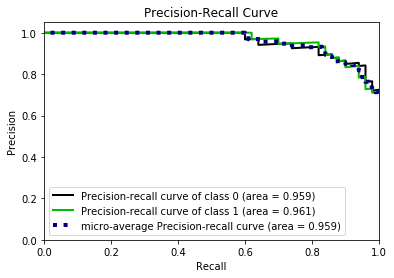

In [52]:
# 2. recall score(really important!): for recall score and precision score, 
# I have teach you once I have time, as this is a little complex
# but use is really easy for sklearn
# largest is 1.0 like accuracy, bigger is better
print('recall score: ', metrics.recall_score(y_true=y, y_pred=pred))

# as the result is 1, so you could find the result is best
plot_precision_recall(y_true=y, y_probas=prob)
plt.show()

In [85]:
# 3. precision score(really important!): I will teach you
# largest is 1.0 like accuracy, bigger is better
print('precision score: ', metrics.precision_score(y_true=y, y_pred=pred))

precision score:  0.8333333333333334


In [86]:
# 4. f1 score(really important!): I will teach you
# largest is 1.0 like accuracy, bigger is better
print('f1 score: ', metrics.f1_score(y_true=y, y_pred=pred))

f1 score:  0.8653846153846153


confusion matrix:


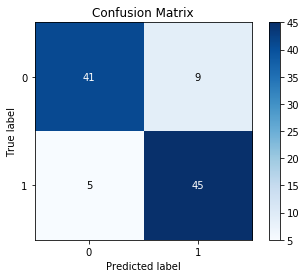

In [87]:
# 5. confusion matrix(really important!) I will teach you
print('confusion matrix:')
metrics.confusion_matrix(y_true=y, y_pred=pred)

plot_confusion_matrix(y_true=y, y_pred=pred)
plt.show()

AUC score is:  0.9456


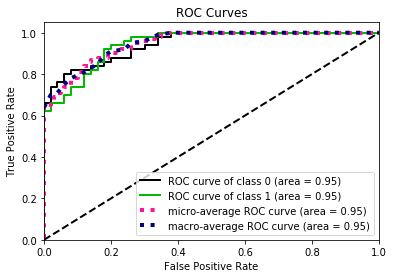

In [88]:
# 6. ROC curve and AUC score
print('AUC score is: ', metrics.roc_auc_score(y, prob[:, 1]))

plot_roc(y, prob)
plt.show()

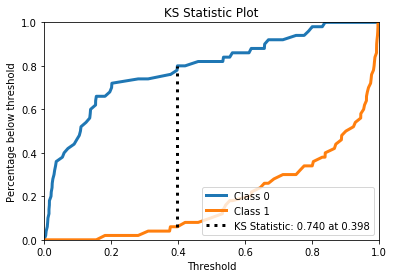

In [89]:
# 7. KS Score for binary classification
plot_ks_statistic(y, prob)
plt.show()

##### Regression problem

In [64]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x, y = load_boston(return_X_y = True)

lr = LinearRegression()

# baseline
lr.fit(x, y)

# get the prediction
pred = lr.predict(x)

# use the mean squared error
print('MSE: ', metrics.mean_squared_error(y, pred))

MSE:  21.8977792176875


Mean square error aka `MSE` is used most in regression problem, the result is really easy: `sum((y - pred) ** 2)`, so the MSE is the residual error of the whole dataset with the truth and prediction, with squared error.
Here I just make the plot for example.

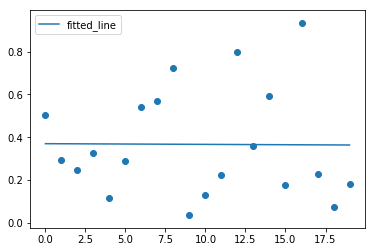

In [75]:
data_y = np.random.random(20)
data_x = np.array(range(len(data_y))).reshape(-1, 1)

plt.scatter(data_x, data_y)

lr = LinearRegression()
lr.fit(data_x, data_y)

# plot fitted regression line: x * w + b
w = lr.coef_
b = lr.intercept_

plt.plot(data_x, data_x * w + b, label='fitted_line')
plt.legend()

plt.show()

# the mean squared error is to compute every data point minus the prediction with that x data and squared.

Mean absolutely error aka `MAE` is used most in regression problem, the result is really easy: `sum(||y - pred||)`, so the `MAE` is the residual error of the whole dataset with the truth and prediction , with absolutely error.

In [69]:
# use the prediction with linear regression
print('Mean absolutely error: ', metrics.mean_absolute_error(y_true=y, y_pred=pred))

Mean absolutely error:  3.2729446379969347


Root mean square error aka `RMSE` is used `most` in regression problem, the result is really easy: `sqrt(sum((y - pred) ** 2))`, so the RMSE is the residual error of the whole dataset with the truth and prediction, with squared error and with sqrt!
In fact, you know that the `RMSE` is based on the `MSE`, but why we also use the `RSME` as metric? The only reason is that the error is smaller then `MSE`(:)). We use `RMSE` many and many times!

In [70]:
# it is smaller than MSE, right?
print('Root mean squared error: ', np.sqrt(metrics.mean_squared_error(y_true=y, y_pred=pred)))

Root mean squared error:  4.679506300635516


R2-score is used to explain how much the model express the variance of the label, R2-score is computed with: `1 - sum(y - pred) / sum(y - mean(y))`, the best R2-score is 1 and could be negative. The constant predictor(to predict whole data with a constant number with mean value, then the r2 is 0.0). The intutive explain is that how much the difference between the truth and prediction, the variance is means the whole data difference with their means, if the most predict very well, then the r2 should be 1.(as `sum(y-pred) == 0`).
You may wonder why we should use R2-score, the reason is that we couldn't get the volumn with `RMSE` and `MAE` like metrics as we couldn't get whether this model is best with lowest error, but the R2-score with the upper bound with 1, then if the model predict with 1, then you are the best :)).

In [72]:
# as you could see, r2 is not 1., but not very close.
print('R2 score of the regression: ', metrics.r2_score(y_true=y, y_pred=pred))

R2 score of the regression:  0.7406077428649427


### 4. Model storage

The last part is to store the trained model into disk or server side. The storage is really easy for model storage. 

In [84]:
from sklearn.externals import joblib
import pickle
import tempfile
import shutil
import os

tmp_path = tempfile.mkdtemp()

lr = LogisticRegression()
lr.fit(x, y)

# in fact, we could use two ways to store the model
# fisrt is to use the picke(not recommend)
s = pickle.dumps(lr)

# load the model, we could use the loaded model to get the prediction
lr_new_pickle = pickle.loads(s)

print('prediction with new loaded lr with pickle:', lr_new_pickle.predict(x)[:3])

# second way to store with joblib (more efficient for bigger model, recommend)
joblib.dump(lr, os.path.join(tmp_path, 'lr.joblib'))

lr_new_joblib = joblib.load(os.path.join(tmp_path, 'lr.joblib'))

print('prediction with new loaded with joblib: ', lr_new_joblib.predict(x)[:3])

# you could see the same result.

prediction with new loaded lr with pickle: [0 0 0]
prediction with new loaded with joblib:  [0 0 0]
